# Cortical control in SCCwm-DBS
## Classifying Target Engagement


### Overview
How can we be sure we're stimulating the SCCwm?
What signal can we use to optimize our therapeutic parameters, including location, voltage, and frequency?

In this notebook we'll address this question by developing a classifier capable of specifically identifying SCCwm-DBS.

### Methods

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import DBSpace as dbo
from DBSpace.visualizations import EEG_Viz
from DBSpace.control import proc_dEEG
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, FastICA

sns.set_context('paper')
sns.set(font_scale=4)
sns.set_style('white')

Using DBSpace LATEST
Importing from DBSpace.control...


## Binary Classification

/home/virati/py_37_env/lib/python3.7/site-packages/mne/utils/docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/home/virati/py_37_env/lib/python3.7/site-packages/mne/utils/docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


376
DOING BINARY


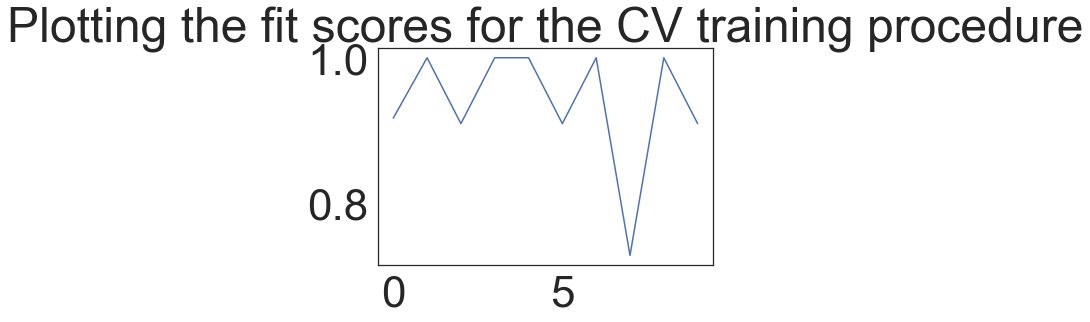

In [2]:
all_pts = ['906','907','908']
EEG_analysis = proc_dEEG.proc_dEEG(pts=all_pts,procsteps='conservative',condits=['OnT','OffT'])
#%%
EEG_analysis.train_binSVM(mask=False)

0.9507575757575758


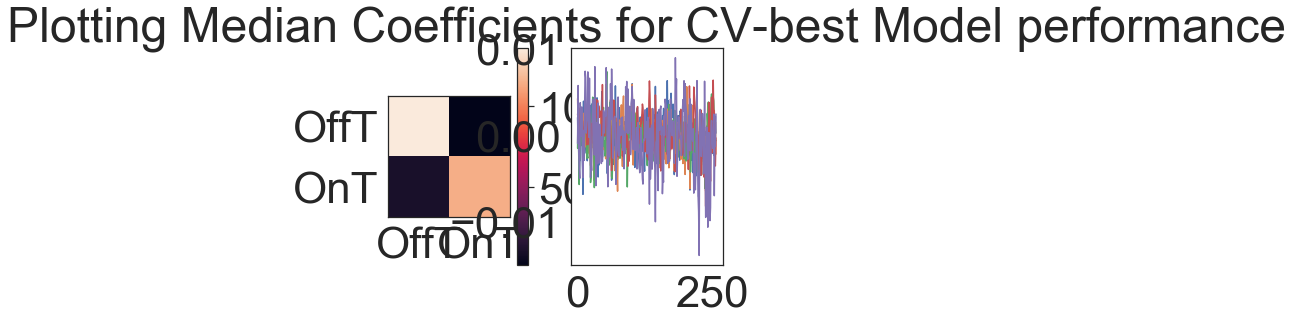

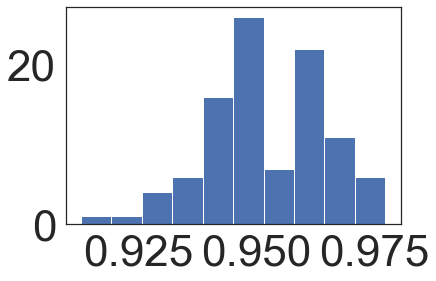

In [7]:
EEG_analysis.oneshot_binSVM()
EEG_analysis.bootstrap_binSVM()

/home/virati/py_37_env/lib/python3.7/site-packages/mne/utils/docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/home/virati/py_37_env/lib/python3.7/site-packages/mne/utils/docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/virati/py_37_env/lib/python3.7/site-packages/mne/utils/docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``r

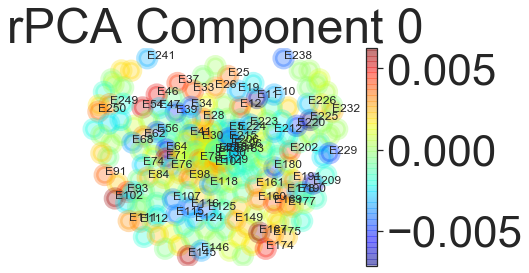

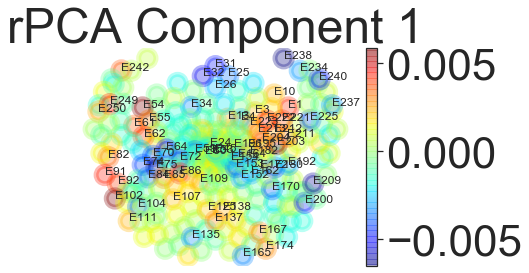

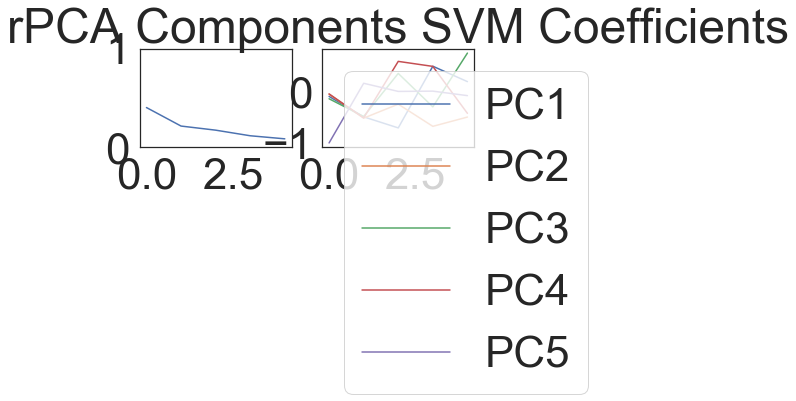

In [4]:
EEG_analysis.OnT_dr(data_source=EEG_analysis.SVM_coeffs)

DOING BINARY - Learning Curve


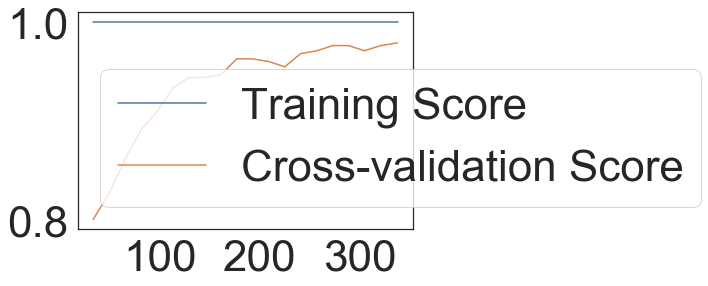

In [5]:
EEG_analysis.learning_binSVM()


## Salient Channels

/home/virati/py_37_env/lib/python3.7/site-packages/mne/utils/docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/home/virati/py_37_env/lib/python3.7/site-packages/mne/utils/docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


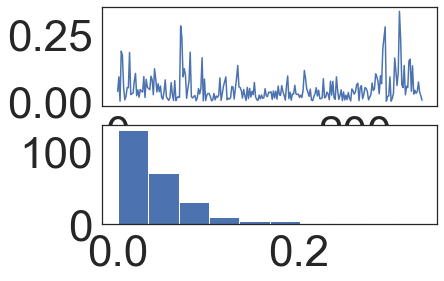

<Figure size 432x288 with 0 Axes>

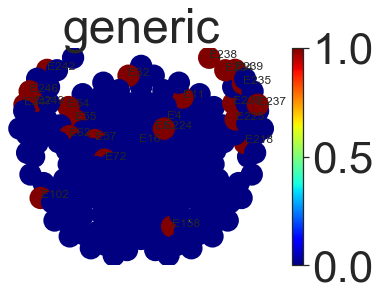

In [6]:
EEG_analysis.analyse_binSVM()